In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [126]:
data = pd.read_csv("GlobalLandTemperaturesByState.csv")
data

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [127]:
filtered_data = data.loc[:, ["dt", "AverageTemperature", "State"]]
filtered_data

,dt,AverageTemperature,State
0,1855-05-01,25.544,Acre
1,1855-06-01,24.228,Acre
2,1855-07-01,24.371,Acre
3,1855-08-01,25.427,Acre
4,1855-09-01,25.675,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [128]:
filtered_data["dt"] = pd.to_datetime(filtered_data["dt"])
#converts the date string into a pandas dataframe object (can use mathematical operators on it)

date_filtered_data = filtered_data[filtered_data["dt"] >= "2000-01-01"]
#check if equal/greater than Jan 1st, 2000

date_filtered_data

,dt,AverageTemperature,State
1736,2000-01-01,25.934,Acre
1737,2000-02-01,26.102,Acre
1738,2000-03-01,26.107,Acre
1739,2000-04-01,25.952,Acre
1740,2000-05-01,25.832,Acre
...,...,...,...
645670,2013-05-01,21.634,Zhejiang
645671,2013-06-01,24.679,Zhejiang
645672,2013-07-01,29.272,Zhejiang
645673,2013-08-01,29.202,Zhejiang


In [129]:
states_included = ["Wyoming", "Nebraska", "South Dakota"]
#the three subcategories i want

states_filtered_data = date_filtered_data[date_filtered_data["State"].isin(states_included)]
#look at the row state, check if the subcategory elements listed above are contained in the column "State" + include only those

states_filtered_data

,dt,AverageTemperature,State
350761,2000-01-01,-2.024,Nebraska
350762,2000-02-01,1.719,Nebraska
350763,2000-03-01,5.687,Nebraska
350764,2000-04-01,9.417,Nebraska
350765,2000-05-01,16.827,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


In [130]:
across_3_states_data = states_filtered_data.groupby("dt")["AverageTemperature"].mean().reset_index()
#mean across 3 states per every date (grouped by date, mean taken of avg temp. for every log attributed to that date)
#reset index to make it a dataframe
across_3_states_data

,dt,AverageTemperature
0,2000-01-01,-4.072000
1,2000-02-01,-0.205000
2,2000-03-01,3.642667
3,2000-04-01,7.609667
4,2000-05-01,14.255000
...,...,...
160,2013-05-01,13.196000
161,2013-06-01,18.783667
162,2013-07-01,22.110333
163,2013-08-01,21.890000


In [131]:
across_3_states_data['dt']

0     2000-01-01
1     2000-02-01
2     2000-03-01
3     2000-04-01
4     2000-05-01
         ...    
160   2013-05-01
161   2013-06-01
162   2013-07-01
163   2013-08-01
164   2013-09-01
Name: dt, Length: 165, dtype: datetime64[ns]

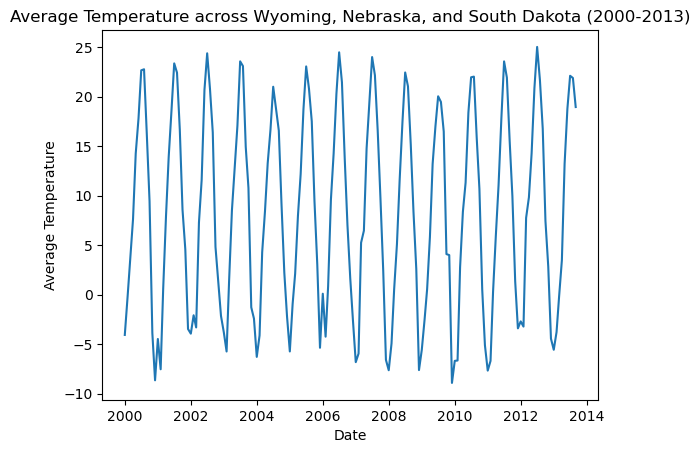

In [132]:
plt.figure()
plt.plot(across_3_states_data["dt"], across_3_states_data["AverageTemperature"])
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Average Temperature across Wyoming, Nebraska, and South Dakota (2000-2013)")
plt.show()

In [133]:
from scipy.optimize import curve_fit
import scipy.optimize as fit

In [134]:
dates_array = []
for date in across_3_states_data["dt"]:
    new_date = date.timestamp()
    dates_array.append(new_date)

dates_array

[946684800.0,
 949363200.0,
 951868800.0,
 954547200.0,
 957139200.0,
 959817600.0,
 962409600.0,
 965088000.0,
 967766400.0,
 970358400.0,
 973036800.0,
 975628800.0,
 978307200.0,
 980985600.0,
 983404800.0,
 986083200.0,
 988675200.0,
 991353600.0,
 993945600.0,
 996624000.0,
 999302400.0,
 1001894400.0,
 1004572800.0,
 1007164800.0,
 1009843200.0,
 1012521600.0,
 1014940800.0,
 1017619200.0,
 1020211200.0,
 1022889600.0,
 1025481600.0,
 1028160000.0,
 1030838400.0,
 1033430400.0,
 1036108800.0,
 1038700800.0,
 1041379200.0,
 1044057600.0,
 1046476800.0,
 1049155200.0,
 1051747200.0,
 1054425600.0,
 1057017600.0,
 1059696000.0,
 1062374400.0,
 1064966400.0,
 1067644800.0,
 1070236800.0,
 1072915200.0,
 1075593600.0,
 1078099200.0,
 1080777600.0,
 1083369600.0,
 1086048000.0,
 1088640000.0,
 1091318400.0,
 1093996800.0,
 1096588800.0,
 1099267200.0,
 1101859200.0,
 1104537600.0,
 1107216000.0,
 1109635200.0,
 1112313600.0,
 1114905600.0,
 1117584000.0,
 1120176000.0,
 1122854400.0,
 

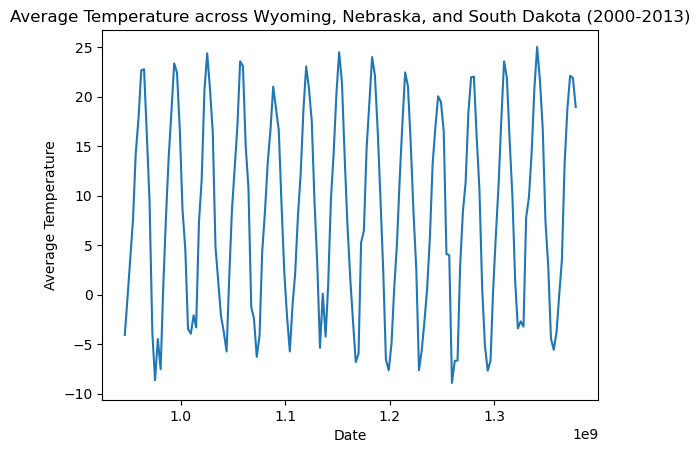

In [135]:
plt.figure()
plt.plot(dates_array, across_3_states_data["AverageTemperature"])
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Average Temperature across Wyoming, Nebraska, and South Dakota (2000-2013)")
plt.show()

In [136]:
across_3_states_data["dt in sec"] = dates_array
across_3_states_data

,dt,AverageTemperature,dt in sec
0,2000-01-01,-4.072000,9.466848e+08
1,2000-02-01,-0.205000,9.493632e+08
2,2000-03-01,3.642667,9.518688e+08
3,2000-04-01,7.609667,9.545472e+08
4,2000-05-01,14.255000,9.571392e+08
...,...,...,...
160,2013-05-01,13.196000,1.367366e+09
161,2013-06-01,18.783667,1.370045e+09
162,2013-07-01,22.110333,1.372637e+09
163,2013-08-01,21.890000,1.375315e+09


In [137]:
def model_eqn(a, b, x, h, k):
    return a*np.sin(b*x-h)+k

In [138]:
across_3_states_data.sort_values(by = ["AverageTemperature"], ascending = False)

,dt,AverageTemperature,dt in sec
150,2012-07-01,25.026667,1.341101e+09
78,2006-07-01,24.482000,1.151712e+09
30,2002-07-01,24.382333,1.025482e+09
90,2007-07-01,24.003000,1.183248e+09
42,2003-07-01,23.568667,1.057018e+09
...,...,...,...
107,2008-12-01,-7.621667,1.228090e+09
96,2008-01-01,-7.639000,1.199146e+09
132,2011-01-01,-7.677333,1.293840e+09
11,2000-12-01,-8.654333,9.756288e+08


In [139]:
a = 20

b = (2*np.pi)/365

h = 10

k = 10

p0 = [a, b, h, k]

par, cov = fit.curve_fit(model_eqn, across_3_states_data["dt in sec"], across_3_states_data["AverageTemperature"], p0)

In [140]:
par

array([2.57792606e+01, 2.22066852e-02, 9.99724989e+00, 5.62925440e+00])

In [141]:
cov

array([[ 2.42463196e+16, -5.63469532e+12,  3.93172961e+14,
         9.18673499e+07],
       [-5.63469532e+12,  2.27880390e+10,  4.62330751e+11,
        -1.42332217e+05],
       [ 3.93172961e+14,  4.62330751e+11,  2.06496284e+13,
        -1.62914709e+06],
       [ 9.18673499e+07, -1.42332217e+05, -1.62914709e+06,
         5.58653524e+01]])

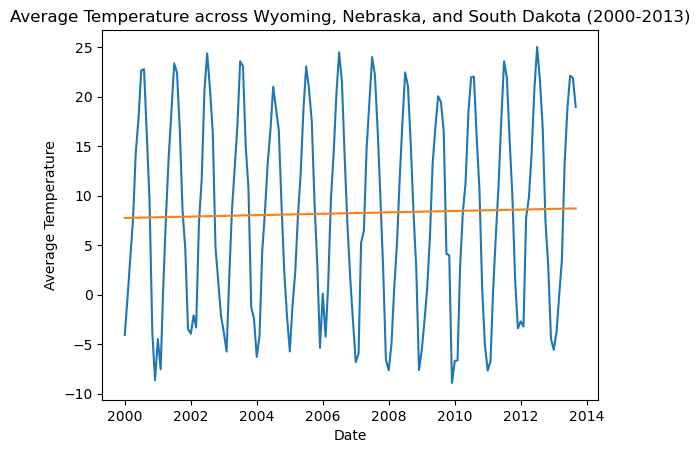

In [142]:
plt.figure()
plt.plot(across_3_states_data["dt"], across_3_states_data["AverageTemperature"])
plt.plot(across_3_states_data["dt"], model_eqn(across_3_states_data["dt in sec"], par[0], par[1], par[2], par[3]))
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.title("Average Temperature across Wyoming, Nebraska, and South Dakota (2000-2013)")
plt.show()

In [143]:
#extract standard errors from the covariance matrix
errors = np.sqrt(np.diag(cov))

#print each parameter with its error
param_names = ["Amplitude (a)", "Frequency (b)", "Phase Shift (h)", "Offset (k)"]
for i, (param, error) in enumerate(zip(par, errors)):
    print(f"{param_names[i]}: {param:.3f} +/- {error:.3f}")

#print the final equation
a, b, h, k = par  #unpack parameters
print("Final equation:")
print(f"y = {a:.3f} * sin({b:.3f} * x - {h:.3f}) + {k:.3f}")


Amplitude (a): 25.779 +/- 155712297.612
Frequency (b): 0.022 +/- 150957.077
Phase Shift (h): 9.997 +/- 4544186.222
Offset (k): 5.629 +/- 7.474
Final equation:
y = 25.779 * sin(0.022 * x - 9.997) + 5.629


In [144]:
#Question 2

In [145]:
list_1 = np.random.randint(0, 200, 50)
list_1

array([ 74,  82,  53,  24,  74,  80, 199,  22, 105,   7, 171,  62, 123,
        64,  60, 186, 161,  84, 108,  57,  91,  79, 181,  63,  68,  85,
        95,  31,   5, 162,  83, 136, 160,  25,  74, 100,  35,  51, 167,
        57,  94,  43,  76, 170, 156,  25,  67, 101,  29,  89])

In [146]:
y_1 = np.arange(0, 50, 1)
y_1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [147]:
list_2 = np.random.randint(0, 200, 50)
list_2

array([ 73, 110,  12,  72,  19,  77,  24, 103, 107, 114, 176, 143, 158,
       184,  11, 114, 158,  16,  25, 135, 190,  78, 153,  49,   3, 180,
       177,  57, 123, 107,  65, 111,  48, 174,  64, 193,   7, 118,  46,
        27,  49,  26, 142, 104,  61,  33,  98, 124,  84, 164])

In [148]:
list_3 = np.random.randint(0, 200, 50)
list_3

array([ 58,  74, 144,  79,  63,  93, 131, 151,  68, 175,  27,  46, 119,
        90, 152,  54, 134, 109,  57,  99, 149, 194,  58,  73,  69,  21,
        41,  24, 163,  29,  37,  94, 166,  96,  77, 193,  22,  78,  15,
       139, 185,   0, 172, 165, 151,  49, 181,  97,  95,  89])

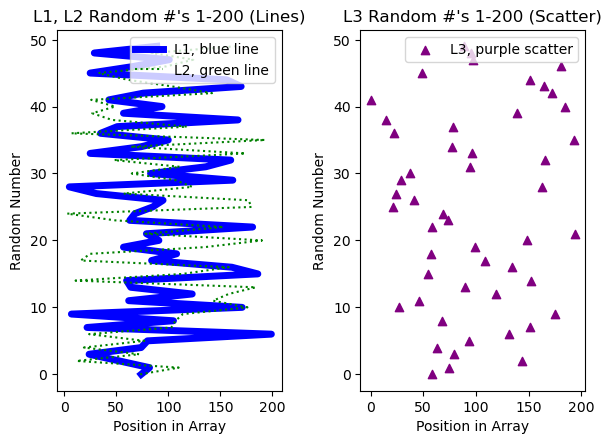

In [149]:
fig, axs = plt.subplots(1,2)
axs[0].plot(list_1, y_1, color = "blue", linewidth = 5, label = "L1, blue line")
axs[0].plot(list_2, y_1, color = "green", linestyle = "dotted", label = "L2, green line")
axs[1].scatter(list_3, y_1, color = "purple", marker = "^", label = "L3, purple scatter")

axs[0].set_xlabel("Position in Array")
axs[0].set_ylabel("Random Number")
axs[1].set_xlabel("Position in Array")
axs[1].set_ylabel("Random Number")

axs[0].set_title("L1, L2 Random #'s 1-200 (Lines)")
axs[1].set_title("L3 Random #'s 1-200 (Scatter)")
#I don't know how to make the titles not overlap

axs[0].legend(loc = "upper right")
axs[1].legend(loc = "upper right")
fig.tight_layout(pad=2.0)

plt.show()

In [150]:
#Question 3 

In [151]:
#function to estimate pi
def estimate_pi(N):
    # Generate random points (x, y) in a 1x1 square
    x = np.random.rand(N)
    y = np.random.rand(N)
    
    #calculate distance from origin
    distances = np.sqrt(x**2 + y**2)
    
    #check if points are inside the quarter circle
    inside_circle = distances <= 1
    points_inside = np.sum(inside_circle)
    
    #estimate pi
    pi_estimate = 4 * points_inside / N
    return pi_estimate, x, y, inside_circle

In [152]:
#test for N = 10, 10^3, 10^5, 10^6
N_values = [10, 10**3, 10**5, 10**6]
for N in N_values:
    pi_estimate, _, _, _ = estimate_pi(N)
    print(f"Estimated pi for N = {N}: {pi_estimate}")

Estimated pi for N = 10: 3.6
Estimated pi for N = 1000: 3.212
Estimated pi for N = 100000: 3.14028
Estimated pi for N = 1000000: 3.141764


In [153]:
#As N gets bigger (multiplied to higher powers) the estimate for pi gets more accurate

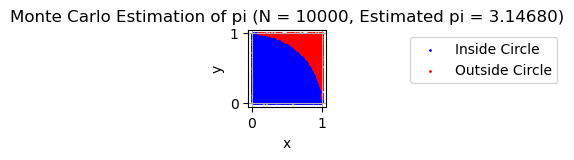

In [154]:
#plot for N = 10^4
N = 10**4
pi_estimate, x, y, inside_circle = estimate_pi(N)

plt.figure(figsize=(1, 1))
plt.scatter(x[inside_circle], y[inside_circle], color="blue", s=1, label="Inside Circle")
plt.scatter(x[~inside_circle], y[~inside_circle], color="red", s=1, label="Outside Circle")

plt.title(f"Monte Carlo Estimation of pi (N = {N}, Estimated pi = {pi_estimate:.5f})")
plt.xlabel("x")
plt.ylabel("y")

plt.legend(bbox_to_anchor = (2, 1))
plt.grid()
plt.show()